## Exploration Data Analysis
**Description by kaggle:**


This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.


**Potential Uses:**

* Analyzing sales trends over time.
* Understanding customer preferences for different items.
* Evaluating the impact of payment methods on revenue.
* Exploring the popularity of items at different times of the day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_sales = pd.read_csv('food_sales.csv')
data_sales

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


#### Clean dataset
Primero analizare los datos faltantes, tomare threshold de 30% de datos nulos para eliminar por completo la columna, si no solo eliminare las instancias que tengan datos faltantes. Tambien podria optar por utilizar un metodo de manejo de datos nulos o faltantes, pero en este caso simplement los eliminaremos.

In [3]:
data_sales.isna().any()

order_id              False
date                  False
item_name             False
item_type             False
item_price            False
quantity              False
transaction_amount    False
transaction_type       True
received_by           False
time_of_sale          False
dtype: bool

In [4]:
data_sales.isna().mean(axis=0)

order_id              0.000
date                  0.000
item_name             0.000
item_type             0.000
item_price            0.000
quantity              0.000
transaction_amount    0.000
transaction_type      0.107
received_by           0.000
time_of_sale          0.000
dtype: float64

Como ninguna supero mi threshold, elimino todas las instancias

In [5]:
data_sales = data_sales.dropna()

In [6]:
data_sales.index = data_sales.date
data_sales = data_sales.drop('date', axis=1)

In [7]:
data_sales

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
date,,,,,,,,,
8/23/2022,2,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
11/20/2022,3,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
02-03-2023,4,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
10-02-2022,5,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
11/14/2022,6,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
...,...,...,...,...,...,...,...,...,...
10/21/2022,992,Sandwich,Fastfood,60,5,300,Cash,Mr.,Morning
7/17/2022,993,Frankie,Fastfood,50,3,150,Online,Mrs.,Night
11-01-2022,994,Panipuri,Fastfood,20,2,40,Online,Mrs.,Evening


Vemos que la fecha tiene formatos un poco diferetes, lo que me generara problemas al castearlas como datetimes. Es decir no me permitira vectorizar esta operacion, pero puedo utilizar una comprension de listas para realizar el loop

In [8]:
date_times = [pd.to_datetime(data_sales.index[idx]) for idx in range(len(data_sales))]

data_sales.index = date_times

In [9]:
data_sales

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
2022-08-23,2,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2022-11-20,3,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
2023-02-03,4,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
2022-10-02,5,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
2022-11-14,6,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
...,...,...,...,...,...,...,...,...,...
2022-10-21,992,Sandwich,Fastfood,60,5,300,Cash,Mr.,Morning
2022-07-17,993,Frankie,Fastfood,50,3,150,Online,Mrs.,Night
2022-11-01,994,Panipuri,Fastfood,20,2,40,Online,Mrs.,Evening
2022-06-18,995,Sugarcane juice,Beverages,25,1,25,Online,Mr.,Night


1. Analizar la tendencia de las ventas en el tiempo

<Axes: >

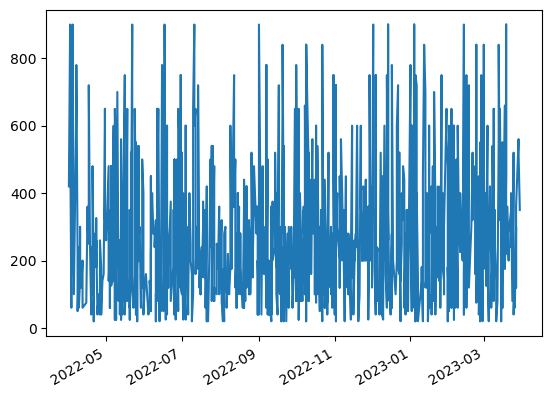

In [10]:
# De esta manera solo observamos ruido
data_sales.transaction_amount.plot()

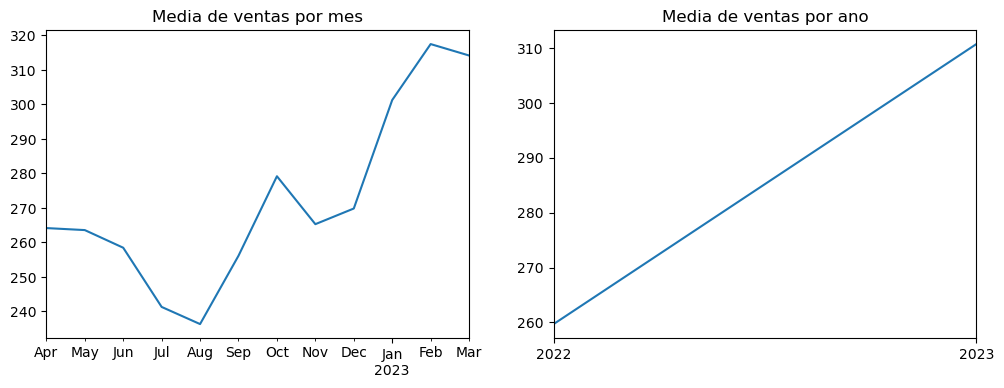

In [11]:
# De esta manera podemos apreciar mejor la tendencia mensual y anual
fig, ax = plt.subplots(1,2, figsize=(12,4))

data_sales.transaction_amount.groupby(pd.Grouper(freq='M')).mean().plot(title='Media de ventas por mes', ax=ax[0])
data_sales.transaction_amount.groupby(pd.Grouper(freq='Y')).mean().plot(title='Media de ventas por ano', ax=ax[1])
plt.show()

2. Entender la preferencia del cliente por los productos

In [12]:
data_sales[['item_type','quantity']].groupby('item_type').mean()

,quantity
item_type,
Beverages,8.259124
Fastfood,8.030695


In [13]:
data_sales[['item_type','transaction_amount']].groupby('item_type').mean()

,transaction_amount
item_type,
Beverages,268.996350
Fastfood,274.200323


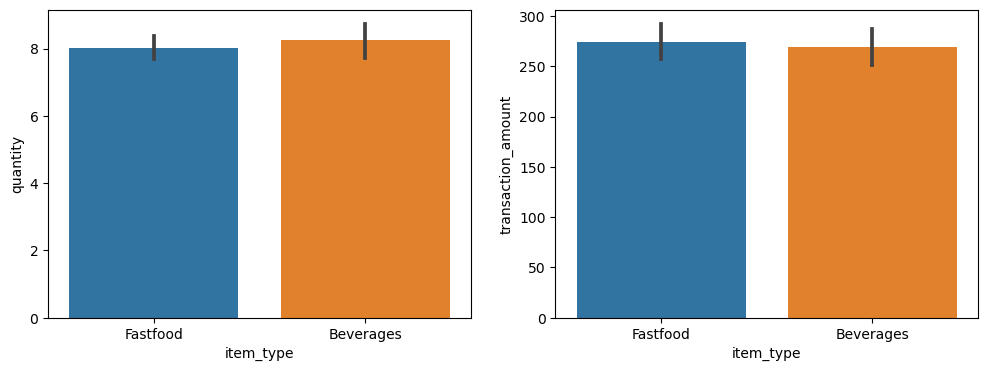

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(data= data_sales,x='item_type', y='quantity',ax=ax[0])
sns.barplot(data= data_sales,x='item_type', y='transaction_amount', ax=ax[1])

plt.show()

Practicamente con respecto a la cantidad y el total de la transaccion, hay un 50-50 aproximadamente. Es decir los clientes no tienen una preferencia especial por alguno de los 2 tipos de productos ofrecidos

3. Evaluar el impacto de los metodos de pago en la ganancia

In [15]:
data_sales[['transaction_type','transaction_amount']].groupby('transaction_type').mean()

,transaction_amount
transaction_type,
Cash,279.075630
Online,265.215827


In [16]:
data_sales[['transaction_type','quantity']].groupby('transaction_type').mean()

,quantity
transaction_type,
Cash,8.283613
Online,7.892086


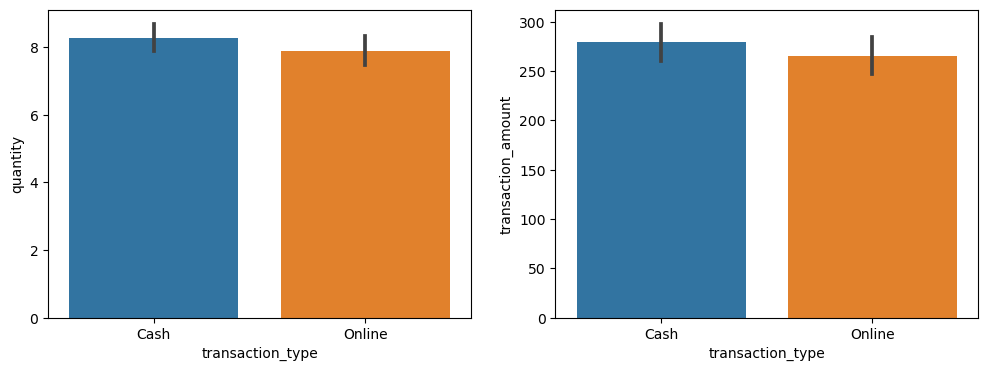

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(data= data_sales,x='transaction_type', y='quantity',ax=ax[0])
sns.barplot(data= data_sales,x='transaction_type', y='transaction_amount', ax=ax[1])

plt.show()

Podemos ver que el cash (efectivo) es un poco mayor a online. Pero esto puede deberser simplemente por el azar, para formalizar y dar una metrita sobre si el cash realmente genera un impacto en la ganancia haremos un prueba estadistica. Para esto tomaremos un threshold o un p-value de 0.05, es decir 95% de cofianza de una sola cola de la derecha. Es decir que la muestra a (cash) sea mayor que la muestra b (online) $a > b$

In [18]:
from scipy.stats import ttest_ind

In [19]:
ttest_ind(data_sales.query('transaction_type == "Cash"').transaction_amount,
         data_sales.query('transaction_type == "Online"').transaction_amount,
         alternative='greater')

TtestResult(statistic=1.020654678249847, pvalue=0.15384755857042906, df=891.0)

No podemos rechazar la $h_0$ por lo que no podemos atribuir un impacto real o almenos estadisticamente significativo del cash en la cantidad de transaccion

4. Explora la popularidad de los productos en diferentes partes del dia.

In [20]:
data_sales[['time_of_sale','quantity','item_name']].groupby(['time_of_sale','item_name']).mean()

quantity
time_of_sale item_name                
Afternoon    Aalopuri         7.583333
             Cold coffee      9.074074
             Frankie          7.821429
             Panipuri         7.913043
             Sandwich         8.631579
             Sugarcane juice  7.820513
             Vadapav          8.714286
Evening      Aalopuri         7.000000
             Cold coffee      8.148148
             Frankie          8.269231
             Panipuri         6.685714
             Sandwich         6.888889
             Sugarcane juice  8.500000
             Vadapav          7.304348
Midnight     Aalopuri         6.800000
             Cold coffee      7.695652
             Frankie          9.000000
             Panipuri         9.692308
             Sandwich         7.791667
             Sugarcane juice  8.772727
             Vadapav          7.133333
Morning      Aalopuri         8.400000
             Cold coffee      9.214286
             Frankie          8.900000
             Panipuri         8.076923
             Sandwich         9.000000
             Sugarcane juice  8.285714
             Vadapav          6.666667
Night        Aalopuri         9.260870
             Cold coffee      7.333333
             Frankie          7.838710
             Panipuri         9.640000
             Sandwich         9.307692
             Sugarcane juice  8.083333
             Vadapav          7.900000

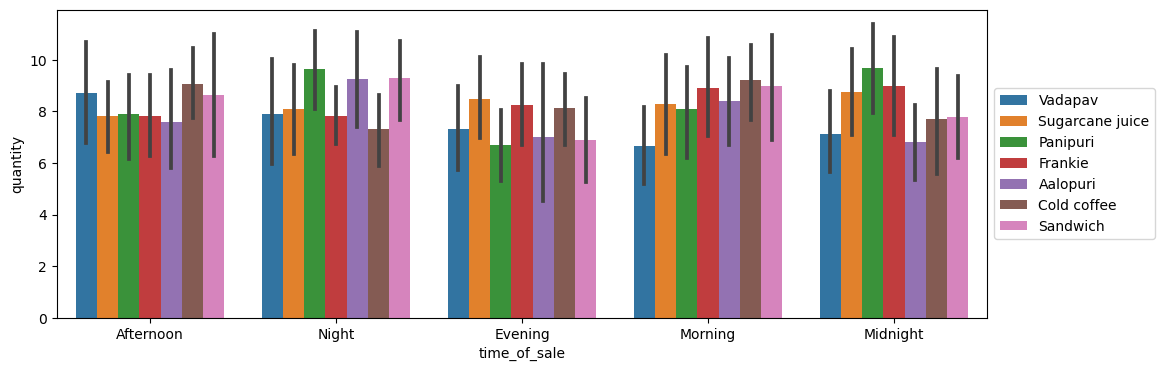

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(data= data_sales,x='time_of_sale', y='quantity', hue='item_name')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

Apartir de estos datos podriamos pruebas estadisticas para determinar si realmente hay diferencia estadistica entre los productos en cada parte del dia. De ser asi eligiremos el mas alto como el favorito para ese momento del dia

In [22]:
from scipy.stats import f_oneway

In [23]:
for part in data_sales.time_of_sale.unique():
    items = data_sales.item_name.unique()
    sample1 = data_sales.query('time_of_sale == @part and item_name == @items[0]').quantity
    sample2 = data_sales.query('time_of_sale == @part and item_name == @items[1]').quantity
    sample3 = data_sales.query('time_of_sale == @part and item_name == @items[2]').quantity
    sample4 = data_sales.query('time_of_sale == @part and item_name == @items[3]').quantity
    sample5 = data_sales.query('time_of_sale == @part and item_name == @items[4]').quantity
    sample6 = data_sales.query('time_of_sale == @part and item_name == @items[5]').quantity
    sample7 = data_sales.query('time_of_sale == @part and item_name == @items[6]').quantity
   
    p_value = f_oneway(sample1,sample2,sample3,
                      sample4,sample5,sample6,sample7).pvalue
    if p_value < 0.05:
        print(part)
    else:
        pass
    print(p_value)
        

0.8695741643438285
0.28392193826420664
0.5616229658386697
0.4358974260420794
0.1823055092837799


Nuevamente aun que facilmente pudimos decir que el item con mayor cantidad es el mas popular segun el dia, con las pruebas estadisticas (estadistic f) podemos comprobar que la diferencia no es estadisticamente significativa como para decir que un produdcto en particular es mas popular que otro. Es decir, todos los productos provienen de una misms distribucion y si alguno tiene mayor media se debe solo al azar

Podriamos tratar de sacar mas infromacion apartir de estos datos

In [24]:
data_sales['dayweek'] = data_sales.index.dayofweek

In [25]:
data_sales[['transaction_amount','dayweek']].groupby('dayweek').mean()

,transaction_amount
dayweek,
0,283.266129
1,295.884956
2,251.048951
3,291.487603
4,270.853659
5,253.082707
6,270.073529


Realmente no parece haber mucha informacion aqui tampoco

Una visualizacion muy tonta seria comparar la cantidad de productos con la transaccion, aun que esto podria darnos un poco de informacion

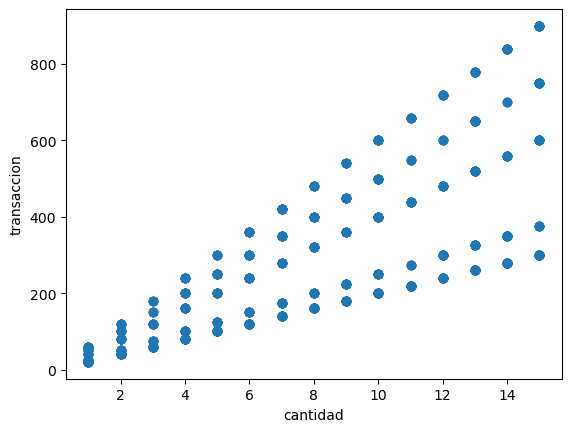

In [26]:
plt.scatter(data_sales.quantity, data_sales.transaction_amount)
plt.xlabel('cantidad')
plt.ylabel('transaccion')
plt.show()

Este tipo de visualizacion podria indicar una paradoja de simpsons, asi que lo dividere por alguna feature discreta

C:\Users\W10 2023\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

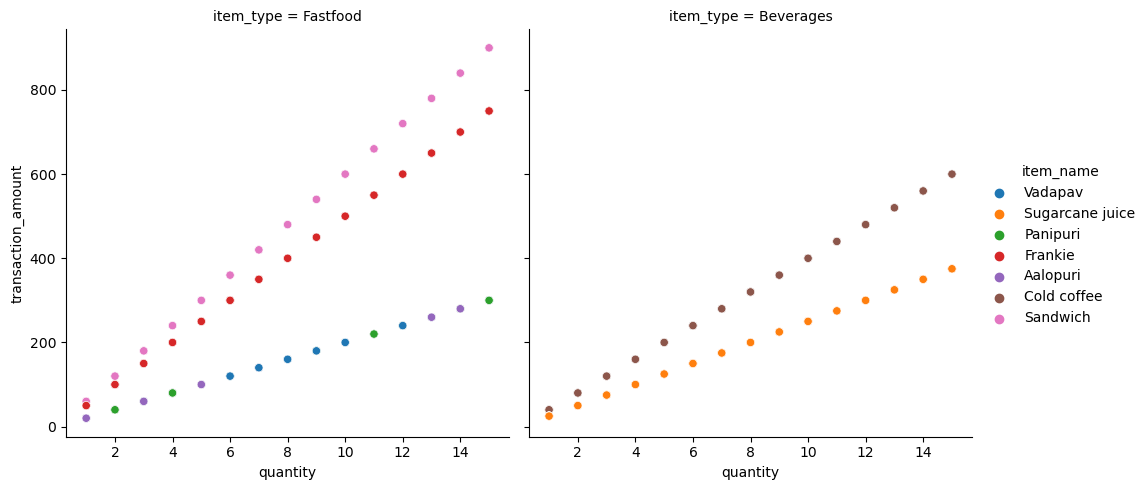

In [27]:
plt.figure(figsize=(20,20))
sns.relplot(data=data_sales, x='quantity', y='transaction_amount',
            col='item_type', hue='item_name',
           kind='scatter')
plt.show()

Aqui por fin parece que obtenemos mas informacion. Tipicamente esto es un problema de paradoja de simpson, sin embargo con python podemos manejarlo facilamente. Podemos observar que el sanwich y el frankie crecen mucho mas rapido en ventas al aumentar la cantidad que el vadapv o el aalopuri y en las bebidas tambien vemos una pendiente diferntes de las rectas. Ademas existen 3 productos que generan exactamente lo mismo, dependiendo de los costos que genera la creacion de esos productos se podria pensar en la posibilidad de conservar solo 1 pues su pendiente es exacamente igual.

In [28]:
items_fastfood = data_sales.query('item_type == "Fastfood"').item_name.unique()

sample_item1 = data_sales.query('item_type == "Fastfood" and item_name == @items_fastfood[0]').transaction_amount
sample_item2 = data_sales.query('item_type == "Fastfood" and item_name == @items_fastfood[1]').transaction_amount
sample_item3 = data_sales.query('item_type == "Fastfood" and item_name == @items_fastfood[2]').transaction_amount
sample_item4 = data_sales.query('item_type == "Fastfood" and item_name == @items_fastfood[3]').transaction_amount
sample_item5 = data_sales.query('item_type == "Fastfood" and item_name == @items_fastfood[4]').transaction_amount

f_oneway(sample_item1,sample_item2,sample_item3,sample_item4,sample_item5).pvalue

1.9512858458998417e-77

Ahora como podemos ver en esta prueba estadistica, el valor p es casi 0. Esto no dice que los items NO provienen de la misma distribucion. Es decir si existe diferencia estadistica entre los items de fastfood, lo que justamente esperabamos

Por ultimo nos podria interesar el valor esperado del las transacciones. Podriamos utilizar la media, aun que realmente esto no seria muy correcto. La esperanza de una distribucion normal en efecto es la media, pero que tal si observamos la distribucion de las ventas (transacciones).

In [29]:
from scipy.stats import norm

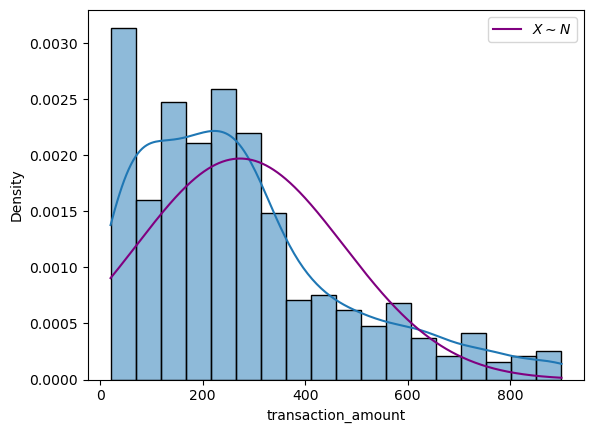

In [30]:
x = np.linspace(data_sales.transaction_amount.min(),
               data_sales.transaction_amount.max(),1000)
N = norm(loc=data_sales.transaction_amount.mean(),
        scale=data_sales.transaction_amount.std())

sns.histplot(data_sales.transaction_amount, stat='density', kde=True)
sns.lineplot(x = x,y = N.pdf(x), color='purple', label='$X \\sim N$')
plt.show()

Tal vez una distribucion normal no sea la mejor opcion para conocer la esperanza de las ventas. Podriamos utilizar estimacion por maxima verosimilitud para conocer que distribucion es la mas probable y poder conocer su esperanza mas probable

In [31]:
from fitter import Fitter ,get_common_distributions

{'exponpow': {'b': 0.7828902172706744, 'loc': 19.999999999999996, 'scale': 433.80247364749187}}


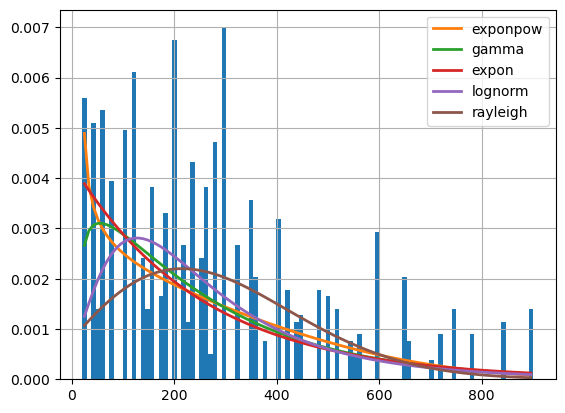

In [32]:
dist =  get_common_distributions()
mle = Fitter(data_sales.transaction_amount, distributions=dist)
mle.fit()
print(mle.get_best())

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.000232,1452.899666,1467.283426,inf,0.082808,8.942035e-06
gamma,0.000238,1459.455338,1473.839098,inf,0.094002,2.558272e-07
expon,0.000239,1458.736218,1468.325391,inf,0.113206,2.003442e-10
lognorm,0.000244,1470.382429,1484.766188,inf,0.065011,1.003944e-03
rayleigh,0.000251,1474.283811,1483.872984,inf,0.114702,1.084599e-10


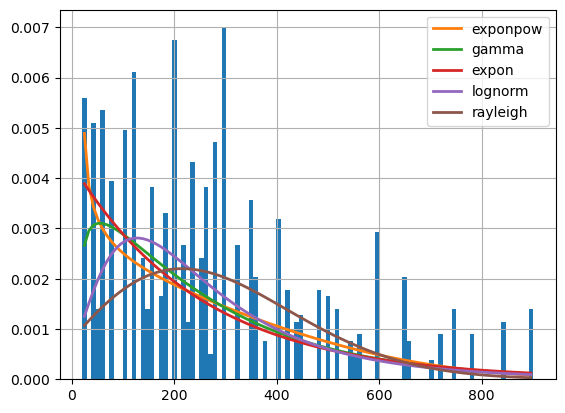

In [159]:
mle.summary()

Por ultimo supongamos que no llega nueva inversion y nos pregunta a que producto de comida deberiamos inverir para mejorarlo y por consecuencia mejorar las ventas. Podriamos probar aleatoriamente inverir un poco en cada producto y ver si aumnetan las ventas o simplemente invertimos todo en el producto que mas ganancias genera. Esto es claro ejemplo de exporacion vs explotacion. Probaremos el algortimo bandidos de multiples brazos para tomar una decision, mas especificamente el algoritmos de `epsilon-greedy` pues es el mas sencillo de implementar.

In [133]:
data_item_fastfood = (data_sales[['item_type','transaction_amount','item_name']]
 .query('item_type == "Fastfood"')[['transaction_amount','item_name']])

rewards = {item:[0] for item in data_item_fastfood.item_name.unique()}


In [70]:
import random

In [136]:
evaluaciones = 8000
epsilon = 0.05
tratamientos = []
for _ in range(evaluaciones):
    rand_num = np.random.rand()
    if rand_num < epsilon:
        rand_samp = data_item_fastfood.sample()
        rewards[data_item_fastfood.sample().item_name.values[0]].append(rand_samp.transaction_amount.values[0])
        tratamientos.append(data_item_fastfood.sample().item_name.values[0])
    else:
        argmax = np.argmax([np.mean(val) for it, val in rewards.items()])
        tratamientos.append(list(rewards.keys())[argmax])

In [139]:
max(tratamientos, key=tratamientos.count)

'Sandwich'

El algoritmo consiste simplemente en explorar con probabilidad $\epsilon$ y explotar con probabilidad $1-\epsilon$. Como se esperaba el algoritmo eligio le item con mayor pendiente o mayor beneficio deacuerdo a las transacciones que se realizan en el. Parece tonto este tipo de experimentos pero supongamos que no teniamos experiencia previa ni datos. Esto no podria ayudar a decir a que producto deberiamos empezar a prestarle mas atencion. Talvez la convergencia sea un poco mas lenta que sus competidores como el muestro de thompson pero es compensado con su enfoque claro e intuitivo contra un enfoque bayesiano